# Detecting Brain Tumors

## Imports

In [1]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import random
import shutil

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import tensorflow as tf

2024-07-11 11:18:33.849667: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-11 11:18:33.863176: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-11 11:18:33.880105: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 11:18:33.903012: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 11:18:33.903052: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-11 11:18:33.925122: I tensorflow/core/platform/cpu_feature_guard.cc:

### Load Dataset

In [2]:
dff = pd.read_csv('data/Brain_Tumor.csv')

In [3]:
dff.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [4]:
dff.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


In [5]:
# drop Image feature
df = dff.drop(columns=['Image'])

In [6]:
df.columns

Index(['Class', 'Mean', 'Variance', 'Standard Deviation', 'Entropy',
       'Skewness', 'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity',
       'Dissimilarity', 'Correlation', 'Coarseness'],
      dtype='object')

### Data Exploration

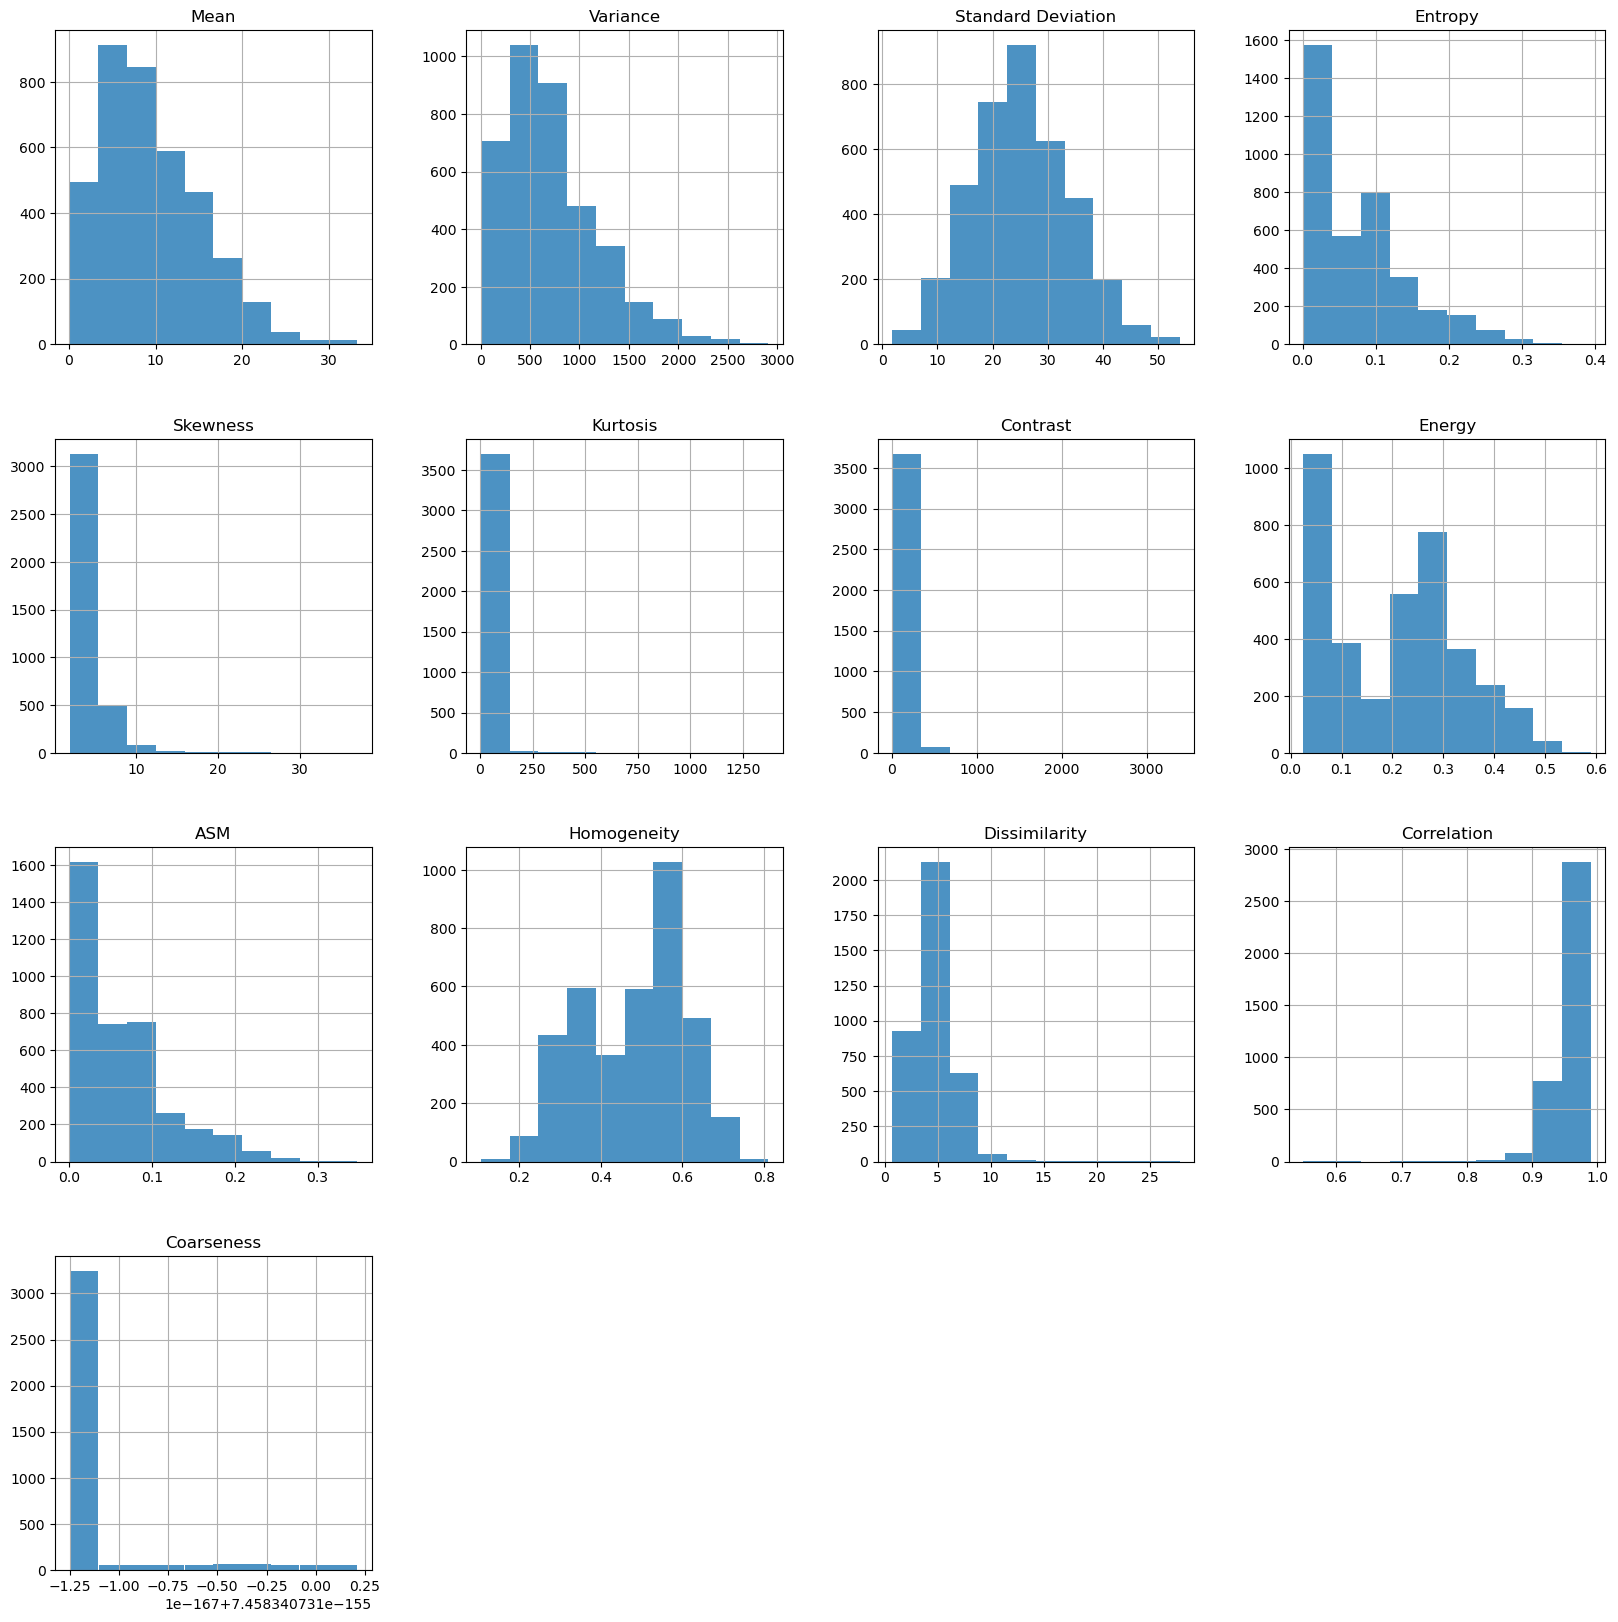

In [7]:
df[df.columns[1:14]].hist(alpha=0.8, figsize=(20, 20))
plt.savefig('plots/distributions.pdf')

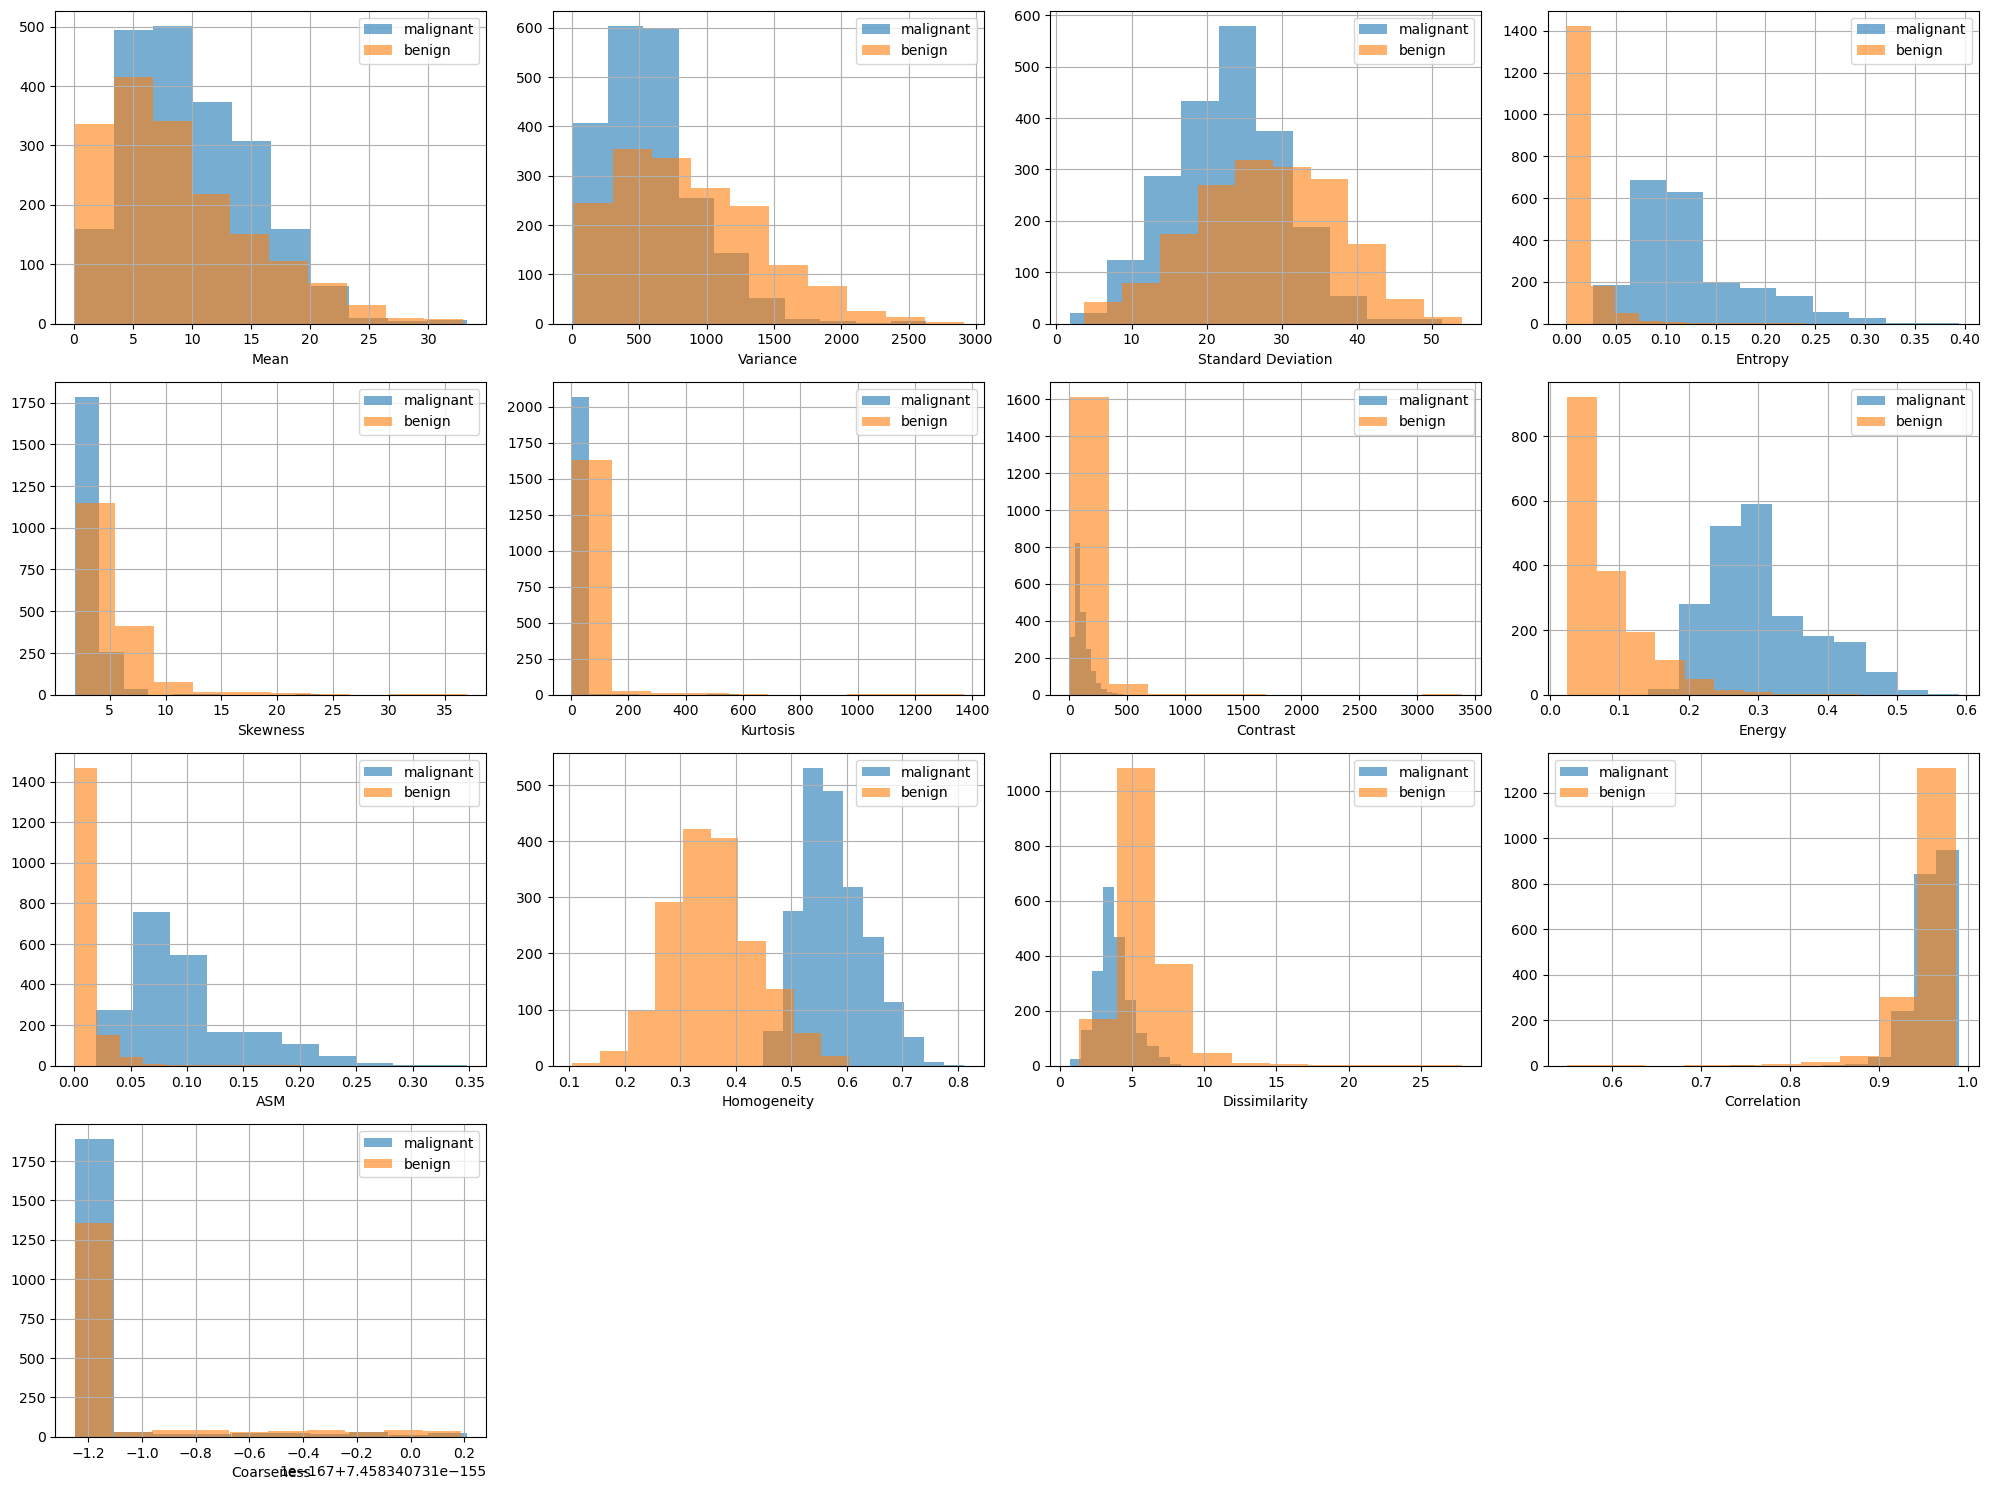

In [8]:
size=(20, 15)

for i in range(1, 14):
    plt.subplot(4, 4, i)
    df.groupby('Class')[df.columns[i]].hist(alpha=0.6, figsize=size)
    plt.legend(['malignant', 'benign'])
    plt.xlabel(df.columns[i])
    plt.tight_layout()
    plt.savefig('plots/benign_malignant_comparison.pdf')

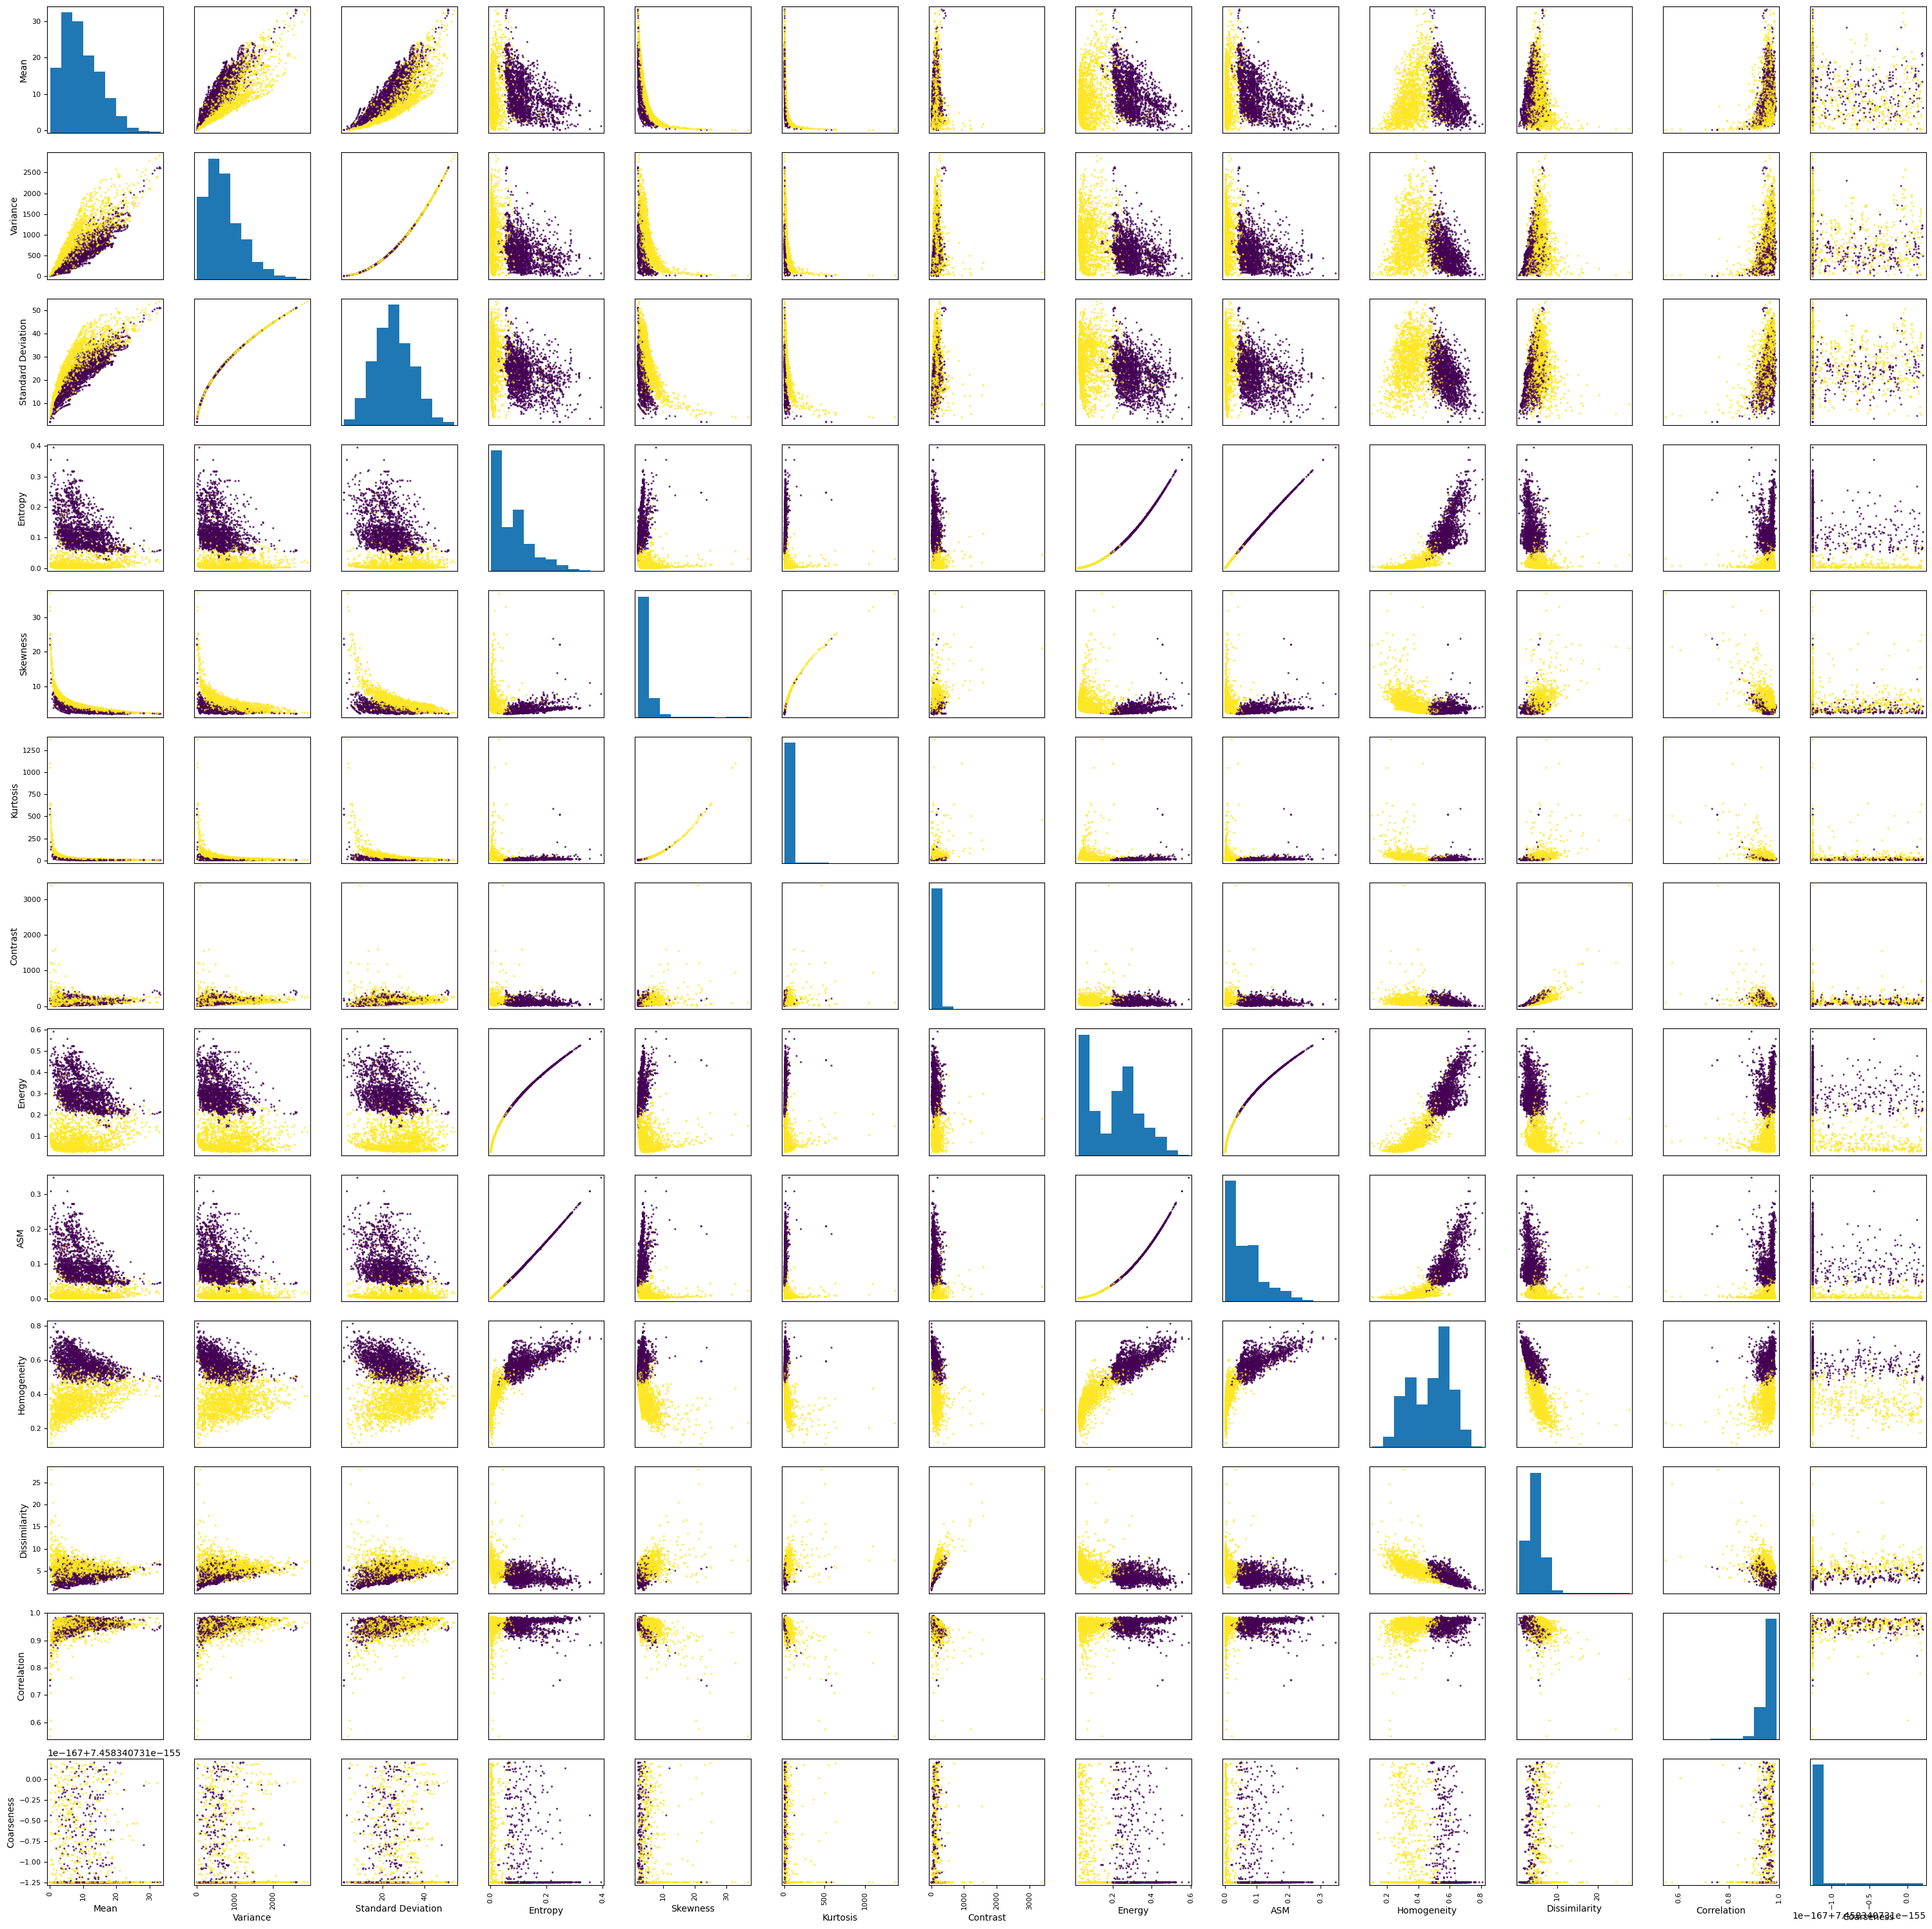

<Figure size 640x480 with 0 Axes>

In [9]:
scatter_matrix(df[df.columns[1:14]], c=df['Class'], alpha=0.8, figsize=(30, 30), s=20)
plt.tight_layout()
plt.show()
plt.savefig('plots/scatter_matrix.pdf')

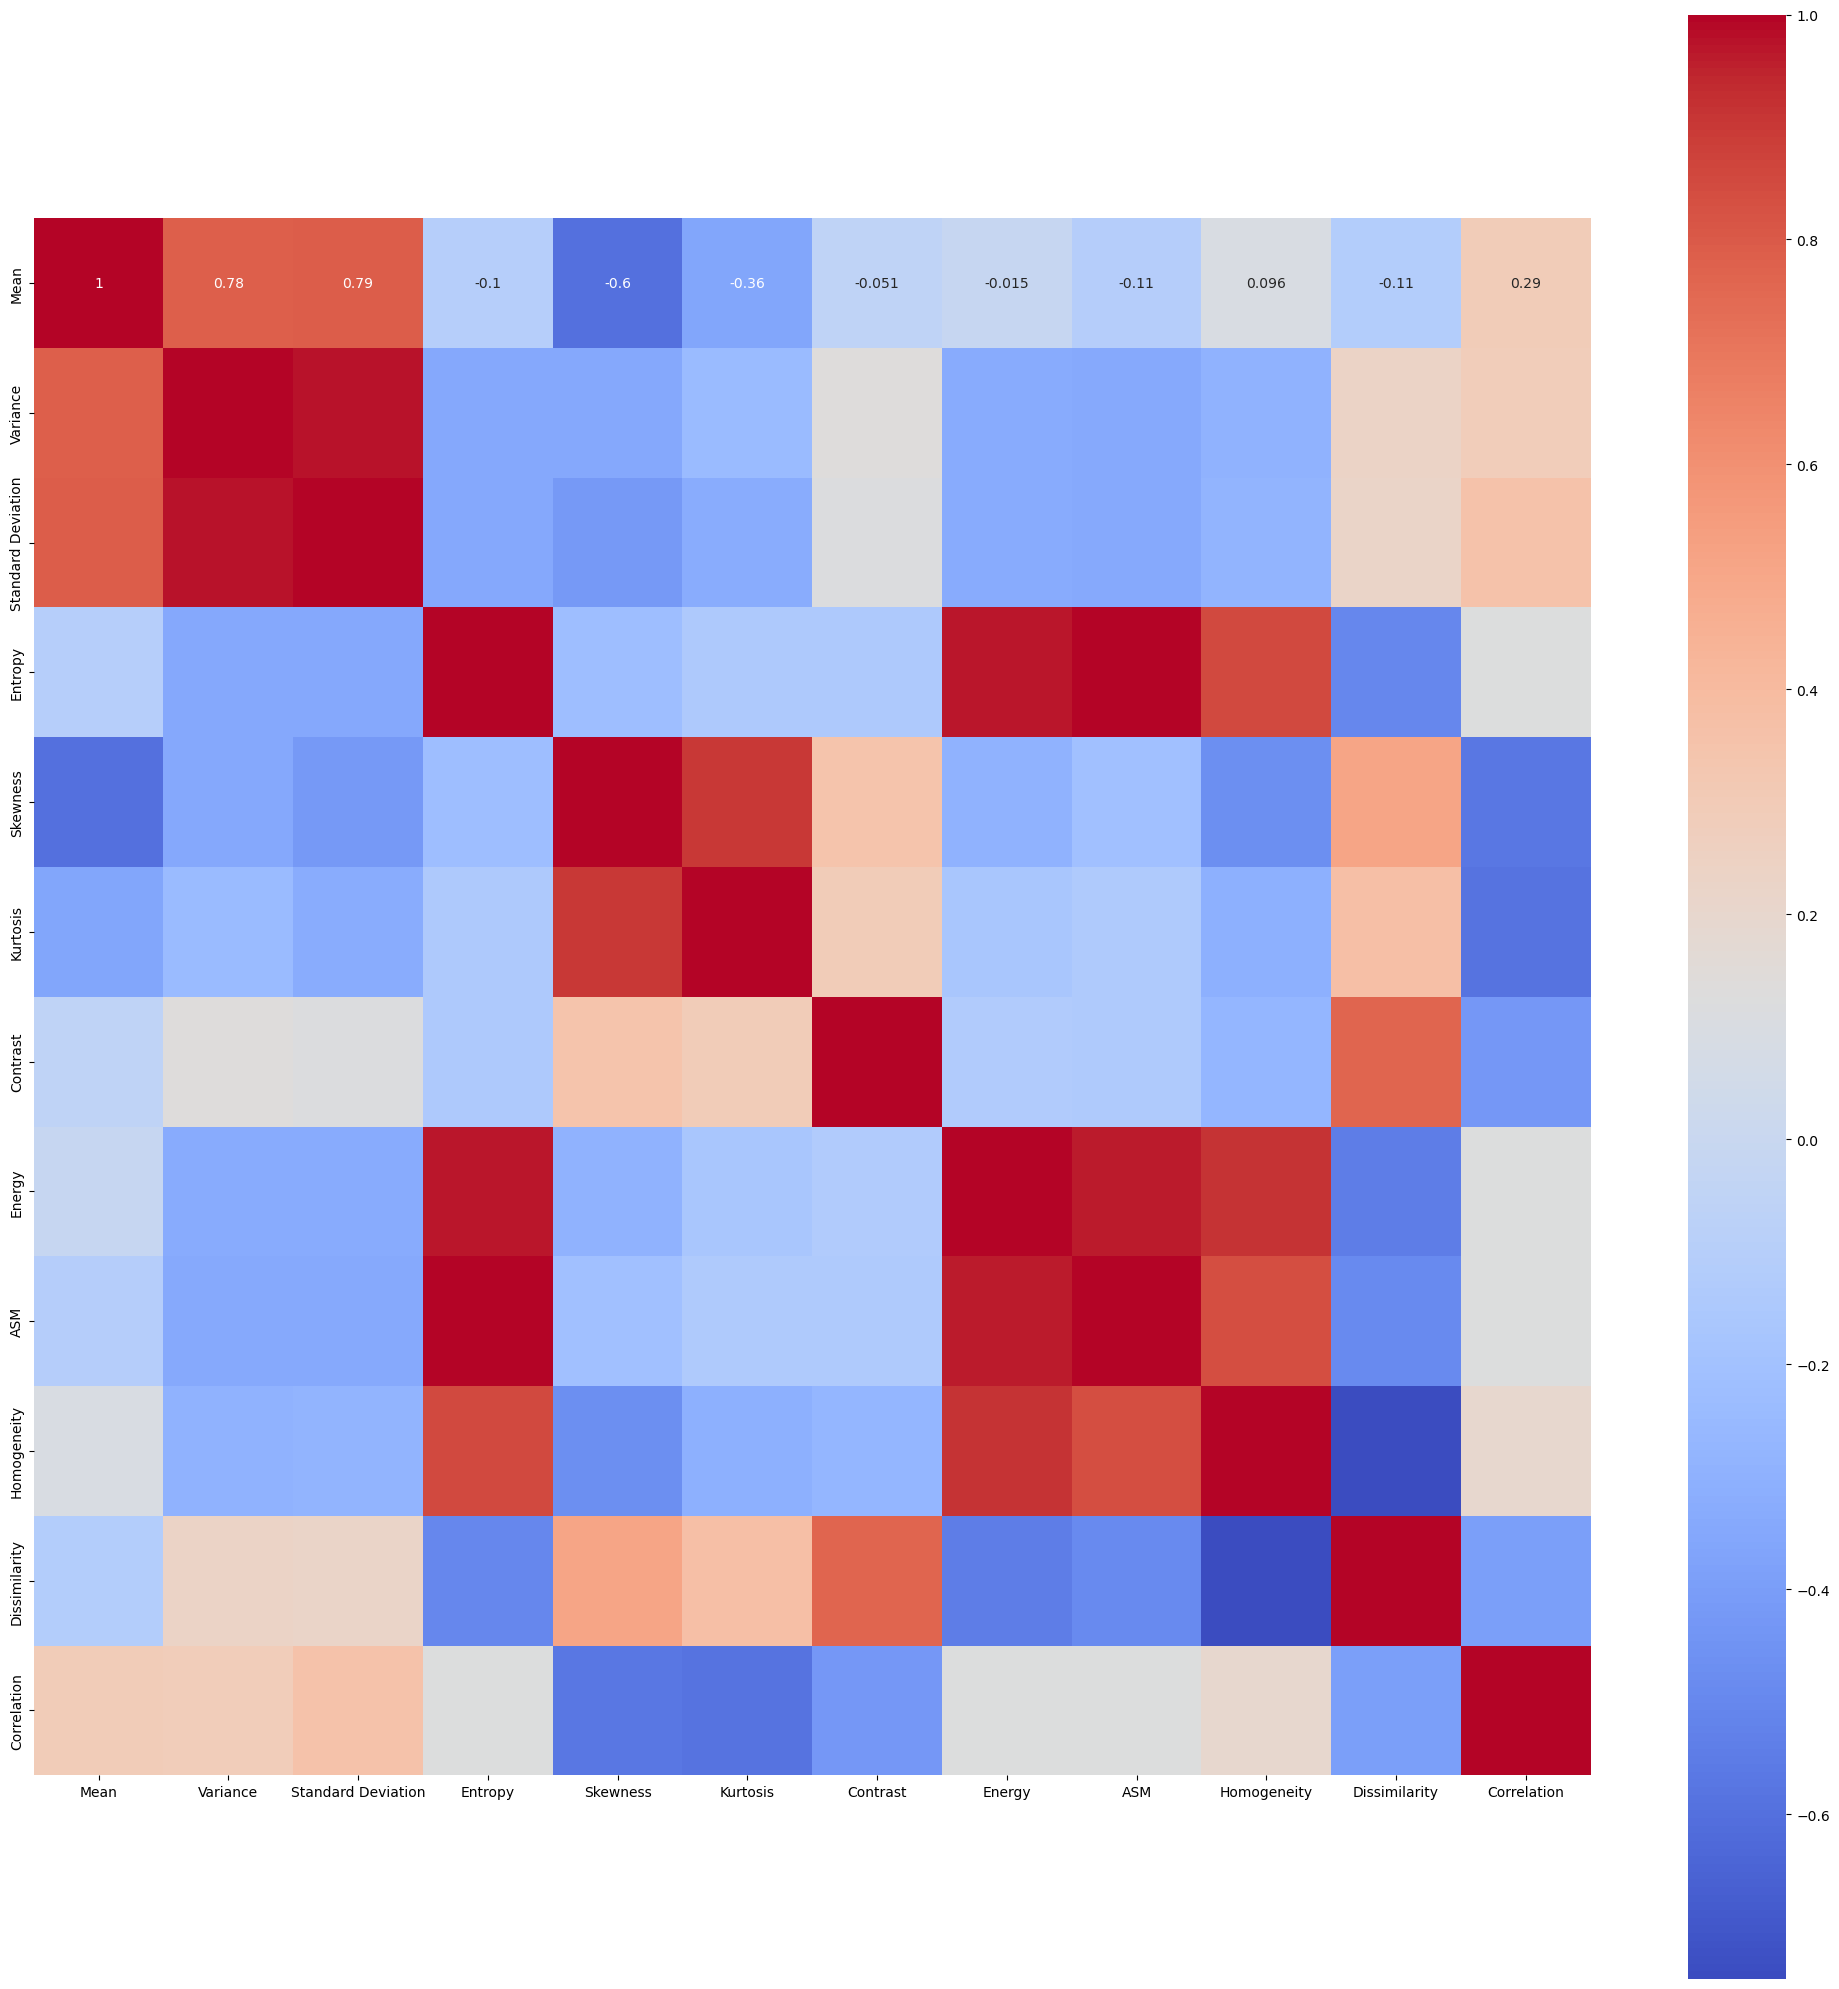

<Figure size 640x480 with 0 Axes>

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df.columns[1:13]].corr(), annot=True, square=True, cmap='coolwarm')
plt.tight_layout()
plt.show()
plt.savefig('plots/correlation.pdf')

## Preprocessing

In [11]:
# test-train split
X, y = np.array(df.iloc[:, 1:14]), df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [12]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Models

### SVM

In [13]:
SVM = SVC()
SVM.fit(X_train, y_train)
svm_pred = SVM.predict(X_test)

In [14]:
print('Accuracy: %.4f' % accuracy_score(y_test, svm_pred))

Accuracy: 0.9801


### Logistic Regression

In [15]:
# Logistic Regression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [16]:
print('Accuracy: %.4f' % accuracy_score(y_test, lr_pred))

Accuracy: 0.9788


### kNN

In [17]:
# kNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)

In [18]:
print('Accuracy: %.4f' % accuracy_score(y_test, knn_pred))

Accuracy: 0.9761


## CNN
### Load Images

In [19]:
# move files from Brain_Tumor directory to Malignant and Benign directories
#for i in range(0, 3762):
#    if df['Class'][i]==0:
#        shutil.move(f'data/Brain_Tumor/Brain_Tumor/Image{i+1}.jpg', f'data/Brain_Tumor/Benign/Image{i+1}.jpg')
#    else:
#        shutil.move(f'data/Brain_Tumor/Brain_Tumor/Image{i+1}.jpg', f'data/Brain_Tumor/Malignant/Image{i+1}.jpg')

In [47]:
img_height = 240
img_width = 240
batch_size = 32
data_dir = 'data/Brain_Tumor'

# get train dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3010 files belonging to 2 classes.
Using 2408 files for training.


In [48]:
# get validation dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3010 files belonging to 2 classes.
Using 602 files for validation.


In [49]:
# get test dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    'data/test_data',
    shuffle=False,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 752 files belonging to 2 classes.


In [50]:
class_names = train_ds.class_names
print(class_names)

['Benign', 'Malignant']


2024-07-11 11:50:38.463408: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


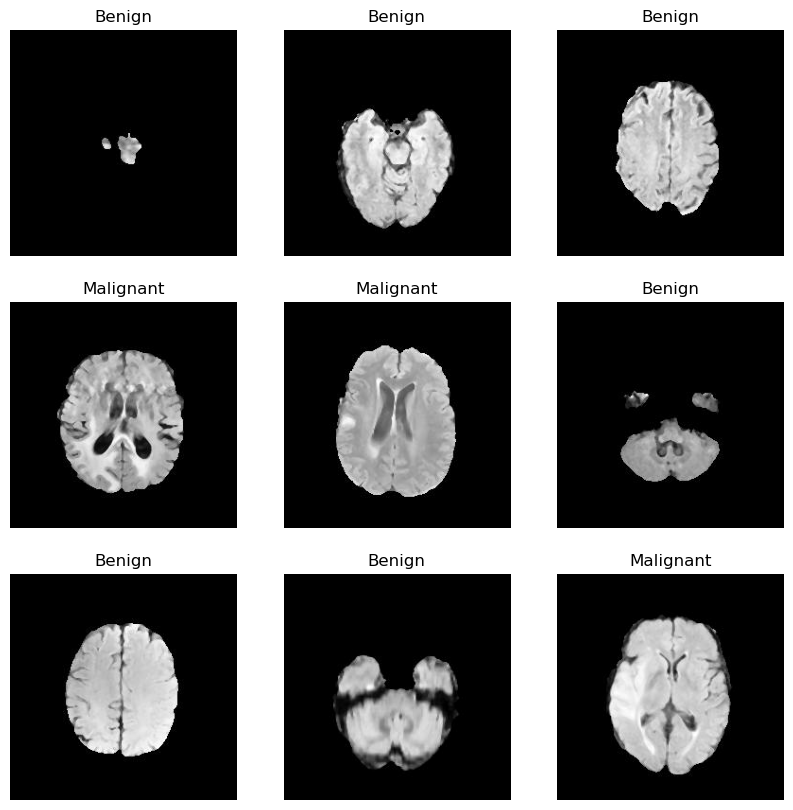

In [51]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.savefig('plots/tumor_images.pdf')

In [25]:
CNN = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2)
])

CNN.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [26]:
CNN.fit(
    train_ds,
    validation_data=val_ds,
    epochs=3
)

Epoch 1/3
76/76 ━━━━━━━━━━━━━━━━━━━━ 66s 850ms/step - accuracy: 0.7473 - loss: 0.5416 - val_accuracy: 0.8538 - val_loss: 0.3232
Epoch 2/3
76/76 ━━━━━━━━━━━━━━━━━━━━ 66s 871ms/step - accuracy: 0.8552 - loss: 0.3228 - val_accuracy: 0.8821 - val_loss: 0.2873
Epoch 3/3
76/76 ━━━━━━━━━━━━━━━━━━━━ 61s 806ms/step - accuracy: 0.9080 - loss: 0.2277 - val_accuracy: 0.8837 - val_loss: 0.3252


In [52]:
cnn_pred = CNN.predict(test_ds)

24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step


In [53]:
cnn_pred = cnn_pred.argmax(axis=1)

In [62]:
# get test labels
test_labels = np.zeros(752)
test_labels[0:336] = 0
test_labels[336:] = 1

In [61]:
print('Accuracy: %.4f' % accuracy_score(test_labels, cnn_pred))

Accuracy: 0.8777
